In [1]:
import tensorflow as tf
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
(X_train,y_train), (X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


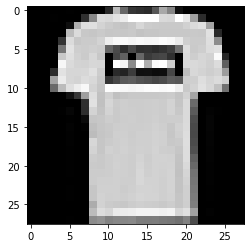

In [5]:
plt.imshow(X_train[1], cmap='gray')

In [6]:
X_test.shape , X_train.shape

((10000, 28, 28), (60000, 28, 28))

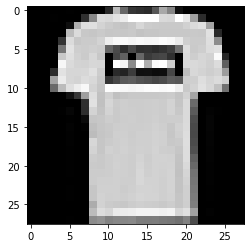

In [9]:
i = random.randint(1, 60000)
plt.imshow(X_train[1], cmap='gray')

In [10]:
label = y_train[i]
label

3

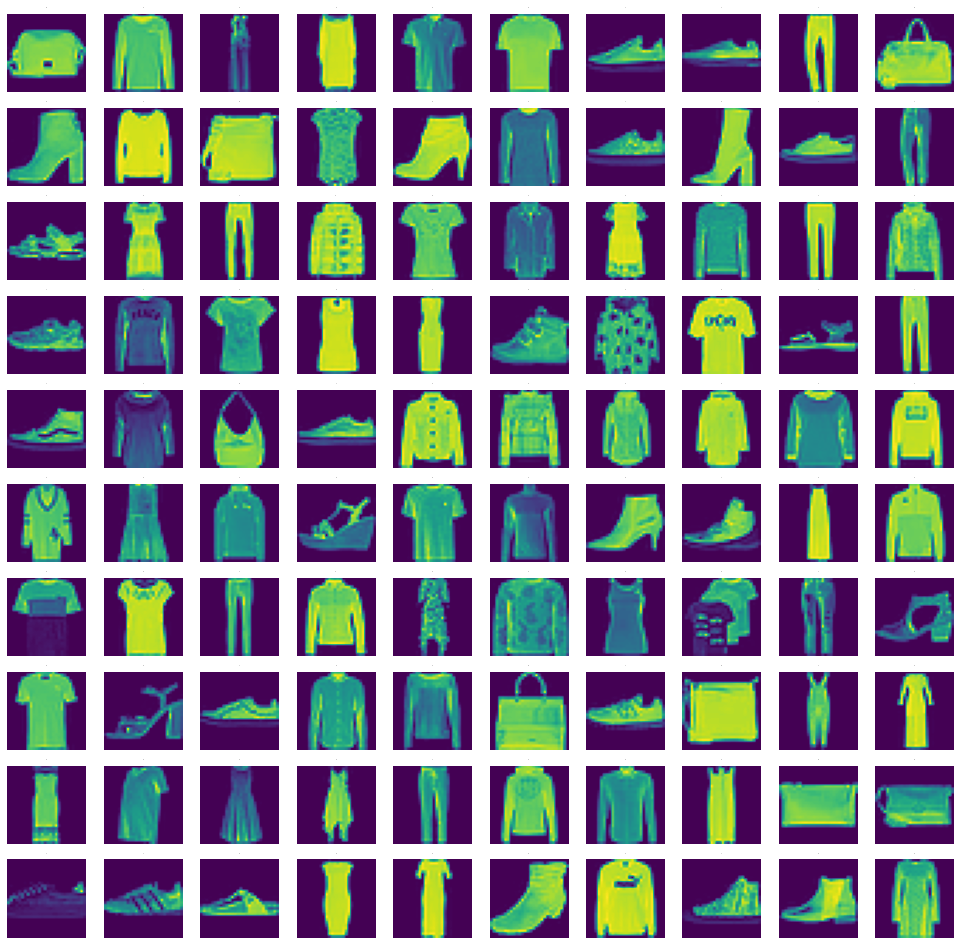

In [14]:
W_grid = 10
L_grid = 10


fig, axes = plt.subplots(L_grid, W_grid, figsize=(17,17))

axes = axes.ravel()

t_training = len(X_train)

for i in np.arange(0, W_grid * L_grid):
  index = np.random.randint(0, t_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index], fontsize = 0)
  axes[i].axis('off')


In [0]:
X_train = X_train/255 
X_test = X_test/255

In [17]:
X_train


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [0]:
noise_factor = 0.4

noise_dataset = []

for img in X_train:
  noisy_image = img + noise_factor * np.random.randn (*img.shape)
  noisy_image = np.clip(noisy_image, 0, 1)
  noise_dataset.append(noisy_image)

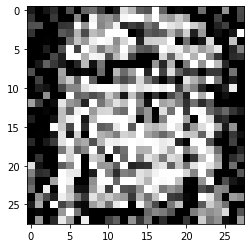

In [58]:
plt.imshow(noise_dataset[5], cmap='gray')

In [0]:
noise_factor = 0.3

noise_test_dataset = []

for img in X_test:
  noisy_image = img + noise_factor * np.random.randn (*img.shape)
  noisy_image = np.clip(noisy_image, 0, 1)
  noise_test_dataset.append(noisy_image)

In [0]:
noise_test_dataset = np.array(noise_test_dataset)

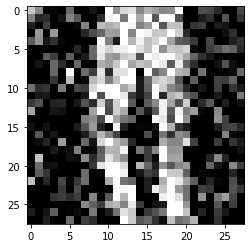

In [59]:
plt.imshow(noise_test_dataset[5], cmap='gray')

In [0]:
autoencoder = tf.keras.models.Sequential(
    layers = None,
)




autoencoder.add(tf.keras.layers.Conv2D(filters=16, kernel_size = 3, strides = 2, padding = 'same', input_shape=(28, 28, 1)))
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size = 3, strides = 2, padding = 'same'))

autoencoder.add(tf.keras.layers.Conv2D(filters=16, kernel_size = 3, strides = 1, padding = 'same'))

# Building Decoder

autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=16, kernel_size = 3, strides = 2, padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=1, kernel_size = 3, strides = 2,activation='sigmoid', padding = 'same'))

In [39]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 16)          1168      
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        2320      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 4,953
Trainable params: 4,953
Non-trainable params: 0
_________________________________________________________________


In [45]:
autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1),
                X_train.reshape(-1, 28, 28, 1),
                epochs=10,
                batch_size = 200,
                validation_data = (noise_test_dataset.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))


Epoch 1/10
300/300 [==============================] - 15s 49ms/step - loss: 0.4043 - val_loss: 0.3302
Epoch 2/10
300/300 [==============================] - 15s 48ms/step - loss: 0.3252 - val_loss: 0.3156
Epoch 3/10
300/300 [==============================] - 14s 48ms/step - loss: 0.3184 - val_loss: 0.3111
Epoch 4/10
300/300 [==============================] - 14s 48ms/step - loss: 0.3154 - val_loss: 0.3081
Epoch 5/10
300/300 [==============================] - 14s 48ms/step - loss: 0.3139 - val_loss: 0.3067
Epoch 6/10
300/300 [==============================] - 14s 48ms/step - loss: 0.3130 - val_loss: 0.3059
Epoch 7/10
300/300 [==============================] - 14s 48ms/step - loss: 0.3123 - val_loss: 0.3049
Epoch 8/10
300/300 [==============================] - 14s 48ms/step - loss: 0.3118 - val_loss: 0.3052
Epoch 9/10
300/300 [==============================] - 14s 48ms/step - loss: 0.3114 - val_loss: 0.3045
Epoch 10/10
300/300 [==============================] - 14s 48ms/step - loss: 0.311

In [47]:
evaluation = autoencoder.evaluate(noise_test_dataset.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1))
print('Testing Loss : {:.3f}'.format(evaluation))

313/313 [==============================] - 1s 4ms/step - loss: 0.3039
Testing Loss : 0.304


In [0]:
predictor = autoencoder.predict(noise_test_dataset[:10].reshape(-1, 28, 28, 1))


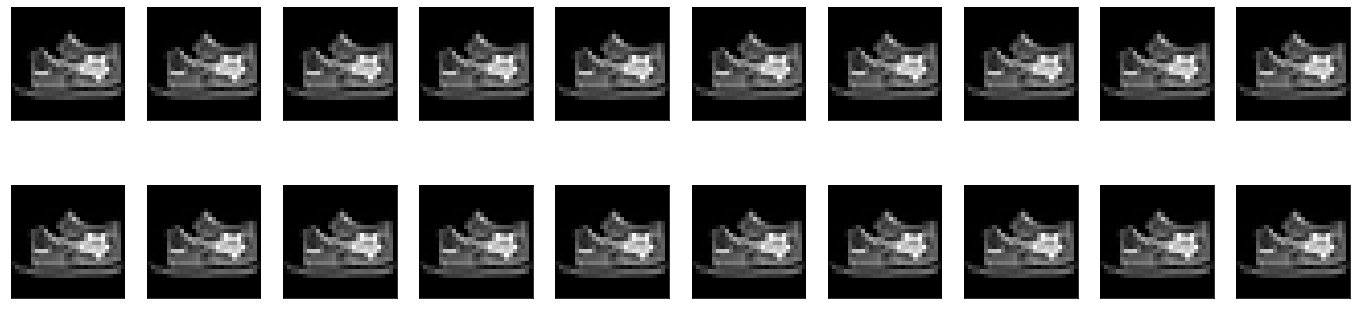

In [68]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(24,6))

for images, row in zip([noise_test_dataset[:10], predictor], axes):
  for images, ax in zip(images, row):
    ax.imshow(img.reshape((28,28)), cmap='Greys_r')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)